## 实现混淆矩阵，精准率和召回率

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1  # 将数据处理成明显的偏斜数据
y[digits.target!=9] = 0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

/Users/aeternae/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9755555555555555

In [6]:
y_log_predict = log_reg.predict(X_test)

In [7]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))

TN(y_test, y_log_predict)

403

In [8]:
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))

FP(y_test, y_log_predict)

2

In [9]:
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))

FN(y_test, y_log_predict)

9

In [10]:
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

TP(y_test, y_log_predict)

36

In [11]:
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_true, y_predict), FP(y_true, y_predict)],
        [FN(y_true, y_predict), TP(y_true, y_predict)]
    ])

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

In [12]:
def precision_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    try:
        return tp / (tp + fp)
    except:
        return 0.0
    
precision_score(y_test, y_log_predict)

0.9473684210526315

In [13]:
def recall_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp / (tp + fn)
    except:
        return 0.0
    
recall_score(y_test, y_log_predict)

0.8

## scikit-learn中的混淆矩阵，精准率和召回率¶

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

In [15]:
from sklearn.metrics import precision_score

precision_score(y_test, y_log_predict)

0.9473684210526315

In [16]:
from sklearn.metrics import recall_score

recall_score(y_test, y_log_predict)

0.8

## F1 Score

In [17]:
import numpy as np

In [18]:
def f1_score(precision, recall):
    try:
        return 2 * precision * recall / (precision + recall)
    except:
        return 0.0

In [19]:
precision = 0.5
recall = 0.5
f1_score(precision, recall)

0.5

In [20]:
precision = 0.1
recall = 0.9
f1_score(precision, recall)

0.18000000000000002

In [21]:
precision = 0.0
recall = 1.0
f1_score(precision, recall)

0.0

In [22]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [24]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

/Users/aeternae/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9755555555555555

In [25]:
y_predict = log_reg.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]])

In [27]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)

0.9473684210526315

In [28]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predict)

0.8

In [29]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.8674698795180723

## Precision & Recall 曲线

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [33]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

/Users/aeternae/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)  # 在最低分与最高分之间设置阈值

for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')   # 通过threshold调整决策边界
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

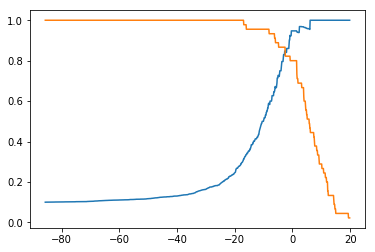

In [35]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

### Precision-Recall 曲线

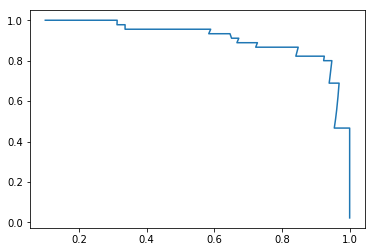

In [36]:
plt.plot(precisions, recalls)
plt.show()

In [37]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [38]:
precisions.shape

(145,)

In [39]:
recalls.shape

(145,)

In [40]:
thresholds.shape   # 少一个步长

(144,)

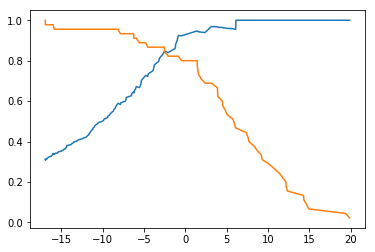

In [41]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

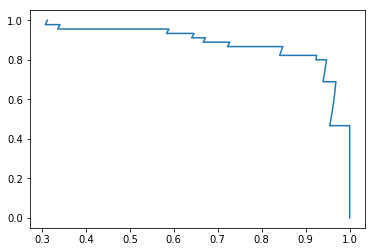

In [42]:
plt.plot(precisions, recalls)
plt.show()

## ROC曲线

In [46]:
from sklearn.metrics import roc_curve
    
fpr, tpr, thresholds = roc_curve(y_test, decision_scores)

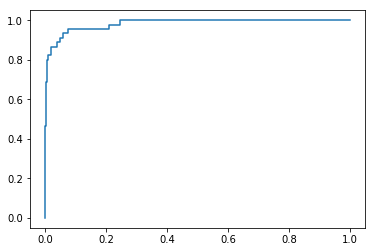

In [47]:
plt.plot(fpr, tpr)

In [49]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)  # 计算ROC曲线下面积 //面积越大，分类越好 

0.9830452674897119

## 多分类问题中的混淆矩阵

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=666)

In [55]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='ovr')
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

/Users/aeternae/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.93115438108484

In [58]:
y_predict = log_reg.predict(X_test)
y_predict

array([8, 1, 3, ..., 1, 0, 3])

In [59]:
from sklearn.metrics import precision_score
precision_score(y_test, y_predict, average="micro")  #为了求出多分类的精准度和召回率，必须传入参数average='micro'

0.93115438108484

In [60]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[147,   0,   1,   0,   0,   1,   0,   0,   0,   0],
       [  0, 123,   1,   2,   0,   0,   0,   3,   4,  10],
       [  0,   0, 134,   1,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 138,   0,   5,   0,   1,   5,   0],
       [  2,   5,   0,   0, 139,   0,   0,   3,   0,   1],
       [  1,   3,   1,   0,   0, 146,   0,   0,   1,   0],
       [  0,   2,   0,   0,   0,   1, 131,   0,   2,   0],
       [  0,   0,   0,   1,   0,   0,   0, 132,   1,   2],
       [  1,   9,   2,   3,   2,   4,   0,   0, 115,   4],
       [  0,   1,   0,   5,   0,   3,   0,   2,   2, 134]])

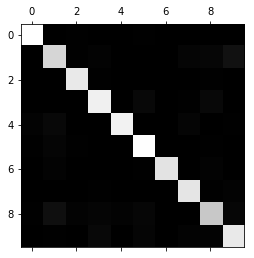

In [65]:
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

In [66]:
row_sums = np.sum(cfm, axis=1)
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix, 0) #将对角线的元素全部置为0 

err_matrix

array([[0.        , 0.        , 0.00735294, 0.        , 0.        ,
        0.00657895, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00735294, 0.01342282, 0.        ,
        0.        , 0.        , 0.02205882, 0.02857143, 0.06802721],
       [0.        , 0.        , 0.        , 0.00671141, 0.        ,
        0.        , 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03289474, 0.        , 0.00735294, 0.03571429, 0.        ],
       [0.01342282, 0.03496503, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02205882, 0.        , 0.00680272],
       [0.00671141, 0.02097902, 0.00735294, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.01398601, 0.        , 0.        , 0.        ,
        0.00657895, 0.        , 0.        , 0.01428571, 0.        ],
       [0.        , 0.        , 0.       

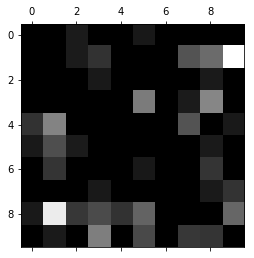

In [67]:
# 越亮代表值越大，也就是错分的越多
plt.matshow(err_matrix, cmap=plt.cm.gray) 
plt.show()